In [1]:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn
import plotly.graph_objects as go
%matplotlib inline

## Задание 1.
Изучалось влияние чёрного и апрельского пара на урожай ржи. Опыт длился шесть лет. Учитывалась масса 1000 зерен в граммах. Результаты опыта следующие:

![image.png](image.png)

Можно ли считать, что урожай ржи по апрельскому пару значимо
выше, чем по черному? Проверить предположения на уровне значимо-
сти 0,05.

*Указание.* Воспользуйтесь критерием знаков. Решите задачу вруч-
ную, т.е. не используя написанную кем-то реализацию критерия на языке программирования Python. Используйте две статистики – биномиальную и статистику Фишера.

### Биномиальная

In [10]:
# Уровень значимости
alpha = 0.05
# Результаты опыта
black = np.array([31.1, 24.0, 24.6, 28.6, 29.1,30.1])
april = np.array([31.6, 24.6, 24.8, 19.1, 29.9,31.0])
# Размер выборки
l = 6
# Инициализируем счетчик для значений меньше 1, т.е. x_i - y_i > 1 -> +
r = 0
# Подсчитываем количество плюсиков
for i in range(0, l):
    if ((black[i] - april[i]) > 1):
        r += 1
# Создаем список биномиальных коэффициентов для значений от 0 до r
C = [math.comb(l, i) for i in range(r + 1)]
# Вычисляем вероятность b, которая соответствует количеству значений меньше 1
b = (1 / 2) ** l * sum(C)
# Определяем какую гипотезу принять
if b <= alpha / 2:
    print("H1 принимаем") # Принимаем альтернативную гипотезу
else:
    print("H0 принимаем") # Принимаем нулевую гипотезу

H0 принимаем


### Фишера

In [11]:
# Параметры для теста Фишера
k1 = 4
k2 = 10

# Значение теста Фишера
Fв = (l - r)/(r + 1)

# Критическое значение 
G = sts.f(4, 10).ppf(1 - alpha)

# Определяем какую гипотезу принять
if Fв >= G:
    print("H1 принимаем") # Принимаем альтернативную гипотезу
else:
    print("H0 принимаем") # Принимаем нулевую гипотезу

H0 принимаем


## Задание 4.
Преподаватели Иванов и Петров, сидя за чашкой чая, сетовали на то, что студенты год от года учатся все хуже и хуже ...
Но так ли это? В файле «Данные 9_2» приведены данные успеваемости студентов, изучавших дисциплину «Основы
математического анализа» в 2022 и 2023 году. Проанализируйте статистические данные по следующему плану:
1) Визуализируйте выборки (постройте гистограммы и боксплоты), а также найдите выборочные числовые характеристики. 
2) Проверьте гипотезу об однородности генеральных совокупностей в части равенства характеристик положения, используя критерий
Уилкоксона - Манна - Уитни.

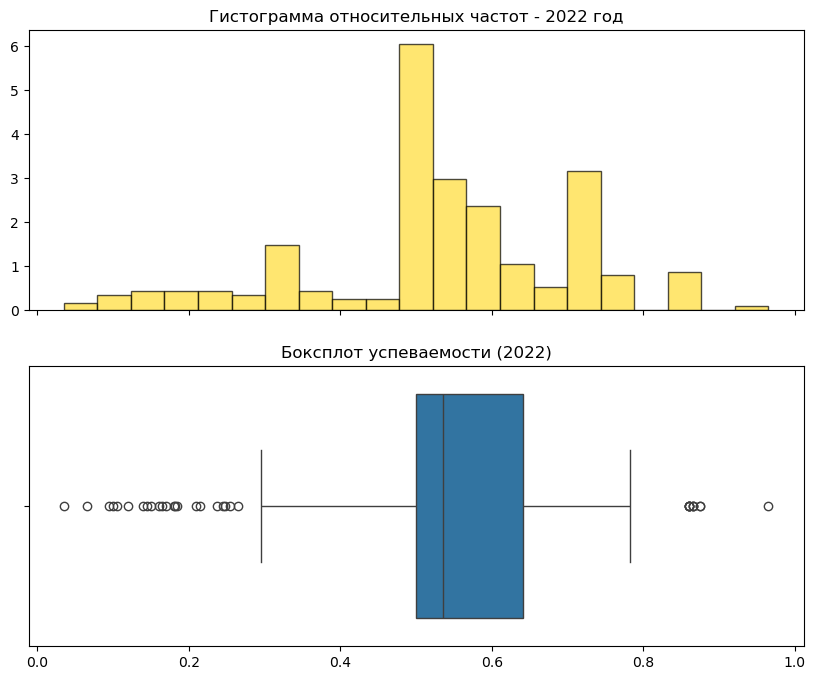

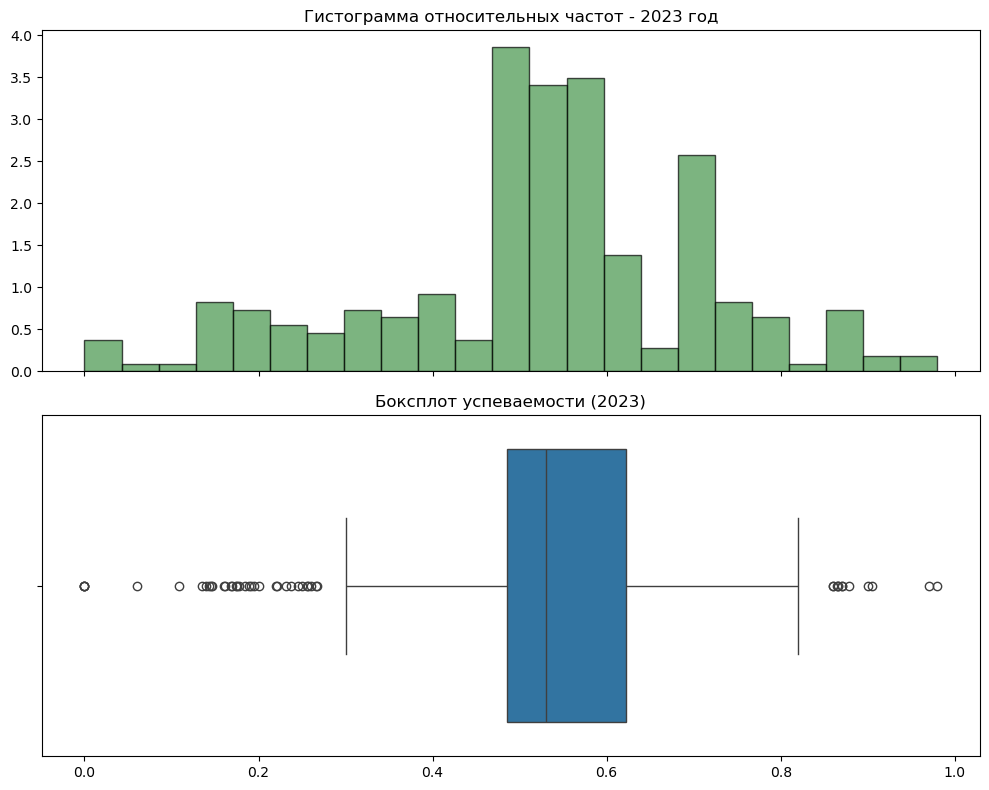

In [8]:
Data = pd.read_excel("Data_9_2.xlsx", names=['OMA_22', 'OMA_23']) 
Data_22 = list(Data['OMA_22'].dropna().astype(float))
Data_23 = list(Data['OMA_23'].dropna().astype(float))

# Выборочные характеристики
m_1 = np.mean(Data_22)
v_1 = np.var(Data_22)
m_2 = np.mean(Data_23)
v_2 = np.var(Data_23)

# Создаем фигуру с двумя подграфиками для данных 2022 года
f, (hist1, box1) = plt.subplots(2, sharex=True, figsize=(10, 8))

# Гистограмма относительных частот 2022
hist1.hist(Data_22, bins='auto', density=True, alpha=0.7, color='#FFDC33', edgecolor='black')
hist1.set_title('Гистограмма относительных частот - 2022 год')

# Боксплот 2022
seaborn.boxplot(Data_22, ax=box1, orient="h")
box1.set_title('Боксплот успеваемости (2022)')

f, (hist2, box2) = plt.subplots(2, sharex=True, figsize=(10, 8))

# Гистограмма относительных частот 2023
hist2.hist(Data_23, bins='auto', density=True, alpha=0.7, color='#44944A', edgecolor='black')
hist2.set_title('Гистограмма относительных частот - 2023 год')

# Боксплот 2023
seaborn.boxplot(Data_23, ax=box2, orient="h")
box2.set_title('Боксплот успеваемости (2023)')
plt.tight_layout()
plt.show()

In [14]:
print ('A:')
print ('Выборочное мат ожидание:' ,m_1)
print ('Выборочная дисперсия:',v_1)
print('\n')
print ('B:')
print ('Выборочное мат ожидание:' , m_2)
print ( 'Выборочная дисперсия:' , v_2)
print('\n')
Man_Yitni = sts.mannwhitneyu(Data_22, Data_23, alternative='two-sided' )
print ('stat=',Man_Yitni[0],'\tpvalue=',Man_Yitni[1])
print ('При alpha <',Man_Yitni[1],' принимаем гипотезу Н0' )

A:
Выборочное мат ожидание: 0.534422373540856
Выборочная дисперсия: 0.028863552836000544


B:
Выборочное мат ожидание: 0.5240823529411764
Выборочная дисперсия: 0.03557555008073817


stat= 33098.0 	pvalue= 0.8436693898141726
При alpha < 0.8436693898141726  принимаем гипотезу Н0


In [ ]:
from math import sqrt

n = len(x)
alpha = 0.05

# Вычисление сумм для дальнейшего вычисления коэфицента корреляции Пирсона
sum_of_x = 0
for i in range(len(x)):
    sum_of_x = sum_of_x + (x[i] - v_m_x)**2

sum_of_y = 0
for i in range(len(y)):
    sum_of_y = sum_of_y + (y[i] - v_m_y)**2

sum_of_x_y = 0
for i in range(len(y)):
    sum_of_x_y = sum_of_x_y + (x[i] - v_m_x)*(y[i] - v_m_y)

# Коэфицент корреляции
r_pearson = 0
for i in range(len(y)):
    r_pearson = sum_of_x_y/np.sqrt(sum_of_x*sum_of_y)

# Статистика
def Z(r):
    Z = math.log((1 + r)/(1 - r)) * 0.5
    return Z

Z = Z(r_pearson)

# Границы
G_left = np.tanh(Z - sts.norm().ppf(1 - 0.5 * alpha)/np.sqrt(n - 3))

G_right = np.tanh(Z + sts.norm().ppf(1 - 0.5 * alpha)/np.sqrt(n - 3))

print('Доверительный интервал при alpha = 0.05: ',G_left,'< ρ <', G_right)

In [1]:
n = len(x)
Statistic = (Z(r_pearson) - Z(0))/(1/np.sqrt(n - 3))

alpha = np.linspace(0, 1, 1000)
i = 0
while abs(Statistic) < sts.t(n - 2).pdf(1 - alpha[i] / 2) / np.sqrt(n - 2 + (sts.t(n - 2).pdf(1 - alpha[i] / 2))**2):
    i +=1

print(alpha[i])

NameError: name 'x' is not defined